# Simple Logistic Regression Examples

Logistic regression is a type of model fitting exercise where the **observed** responses are binary encoded (0,1).  The input design matrix is a collection of features much like ordinary linear regression. 

The logistic function is 

$$\pi_i(\beta) = \frac{e^{X_i~\beta}}{1+e^{X_i~\beta}} $$

where $X_i$ is the i-th row of the design matrix, and $\beta$ are unknown coefficients.

The associated optimization problem is to minimize some measure of error between the model values (above) and the observed values, typically a squared error is considered.

If we consider a single observatyon $Y_i$ its value is either 0 or 1.  So the error is

$$\epsilon_i = Y_i - \pi_i(\beta) = Y_i - \frac{e^{X_i~\beta}}{1+e^{X_i~\beta}} $$

The function we wish to minimize is 

$$\min_{\beta} (Y - \pi(\beta))^T(Y-\pi(\beta))$$

The minimization method is a matter of analyst preference - these are usually well behaved minimization problems (the examples will use [Powell's Direction Set Method](https://en.wikipedia.org/wiki/Powell%27s_method), and the [Broyden–Fletcher–Goldfarb–Shanno](https://machinelearningmastery.com/bfgs-optimization-in-python/) algorithm; most professional tools operate on the logarithm of the components to avoid numerical overflow during the minimization process.  

:::{note}
Powell's method is robust and comparatively simple to program, here is some older code [Powell's Method FORTRAN source code](https://github.com/dustykat/powell-search-tool) that is fairly readable and still works today!
:::

The model result $\pi_i$ will range between 0 and 1, and can be interpreted as a probability that the inputs predict a value of 1.  Normally the decision boundary is set at 0.5, so when the model is cast into a prediction engine it will first compute a $\pi_i$ value, then apply the decision boundary rule to either snap the result to 1 or 0 as indicated by the probability.  

The example below should help clarify a bit.

## Success at Task vs Experience 

A systems analyst studied the effect of experience on ability to complete a complex task within a specified time.
The participants had varying amounts of experience measured in months as shown in the table below, where E represents months of experience, and S is binary 0=FAIL, 1=SUCCESS

```
 E  S
14  0  
29  0  
 6  0  
25  1  
18  1  
 4  0  
18  0  
12  0  
22  1  
 6  0  
30  1  
11  0  
30  1  
 5  0  
20  1  
13  0  
 9  0  
32  1  
24  0  
13  1  
19  0  
 4  0  
28  1  
22  1  
 8  1  
```

Perform a logistic regression and estimate the experience required to ensure sucess with an empirical probability of 75 percent.

In [12]:
# Load the data
experience=[14,29,6,25,18,4,18,12,22,6,30,11,30,5,20,13,9,32,24,13,19,4,28,22,8]
result=[0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1]

Now lets plot the data and see what we can learn, later on we will need a model and data plot on same figure, so just build it here

In [13]:
# Load a Plotting Tool
import matplotlib.pyplot as plt
def make1plot(listx1,listy1,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (6,6)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (6,6)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()

Now plot the data

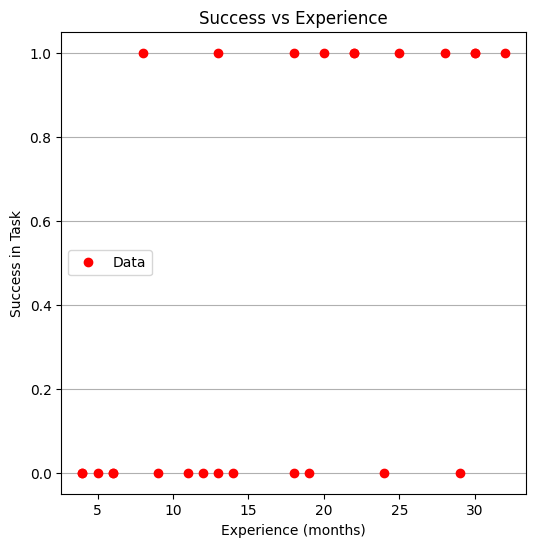

In [14]:
make1plot(experience,result,"Experience (months)","Success in Task","Success vs Experience")

Now a logistic model, we will need 3 prototype functions; a sigmoid function, an error function (here we use sum of squared error) and a merit function to minimize by changing $\beta_0$ and $\beta_1$.

The sigmoid function is

$$\pi_i = \frac{e^{\beta_0 + \beta_1 X_i}}{1+e^{\beta_0 + \beta_1 X_i}} $$


In [15]:
def pii(b0,b1,x): #sigmoidal function
    import math
    pii = math.exp(b0+b1*x)/(1+ math.exp(b0+b1*x))
    return(pii)

def sse(mod,obs): #compute sse from observations and model values
    howmany = len(mod)
    sse=0.0
    for i in range(howmany):
        sse=sse+(mod[i]-obs[i])**2
    return(sse)

def merit(beta): # merit function to minimize
    global result,experience #access lists already defined external to function
    mod=[0 for i in range(len(experience))]
    for i in range(len(experience)):
        mod[i]=pii(beta[0],beta[1],experience[i])
    merit = sse(mod,result)
    return(merit)

Now we will attempt to minimize the merit function by changing values of $\beta$, first lets apply an initial value and check that our merit function works

In [16]:
beta = [0,0] #initial guess of betas
merit(beta) #check that does not raise an exception

6.25

Good we obtained a value, and not an error, now an optimizer

In [17]:
import numpy as np
from scipy.optimize import minimize

#x0 = np.array([-3.0597,0.1615])
x0 = np.array(beta)
res = minimize(merit, x0, method='powell',options={'disp': True})

Optimization terminated successfully.
         Current function value: 4.199713
         Iterations: 5
         Function evaluations: 132


Yay! It found some answer, examine and plot the findings

 b0 =  -2.982390266878914
 b1 =  0.15954743797099522


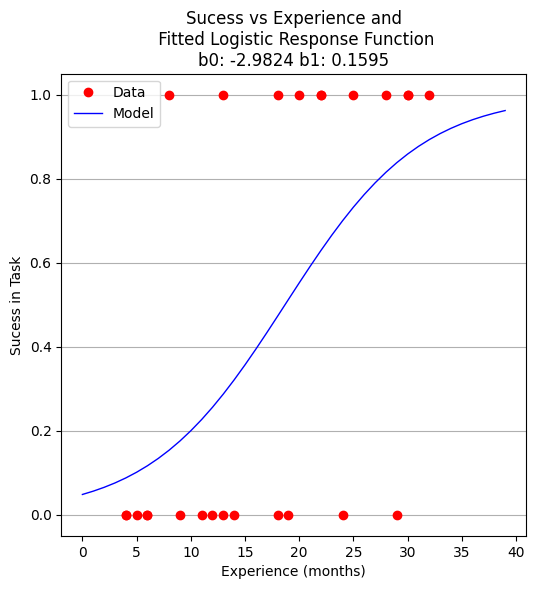

In [18]:
fitted=[0 for i in range(40)]
xaxis =[0 for i in range(40)]
beta[0]=res.x[0]
beta[1]=res.x[1]
for i in range(40):
    xaxis[i]=float(i)
    fitted[i]=pii(res.x[0],res.x[1],float(i))
    
print(" b0 = ",res.x[0])
print(" b1 = ",res.x[1])
plottitle = 'Sucess vs Experience and\n Fitted Logistic Response Function\n'+'b0: '+ str(round(res.x[0],4))+ ' b1: ' +str(round(res.x[1],4))
make2plot(experience,result,xaxis,fitted,'Experience (months)','Sucess in Task',plottitle)

Now to recover estimates of success for different experience levels

In [19]:
guess = 25.5
pii(res.x[0],res.x[1],guess)

0.7476408418994896

So we expect that someone with 25 to 26 months of experience would have a 75 percent chance of success.  Similarily the time to median success is 18 months and 3 weeks.

In [20]:
guess = 18.75
pii(res.x[0],res.x[1],guess)

0.5022810329444896

Now using the same data, but a formal logistic package

In [21]:
# import the class
import numpy
from sklearn.linear_model import LogisticRegression
X = numpy.array(experience)
y = numpy.array(result)
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
# fit the model with data  -TRAIN the model
logreg.fit(X.reshape(-1, 1),y)

LogisticRegression(max_iter=10000)

In [22]:
logreg.coef_

array([[0.16080665]])

In [23]:
xplot = numpy.array(xaxis)
y_pred=logreg.predict(xplot.reshape(-1,1))

b0 = logreg.intercept_[0]
b1 = logreg.coef_[0][0]



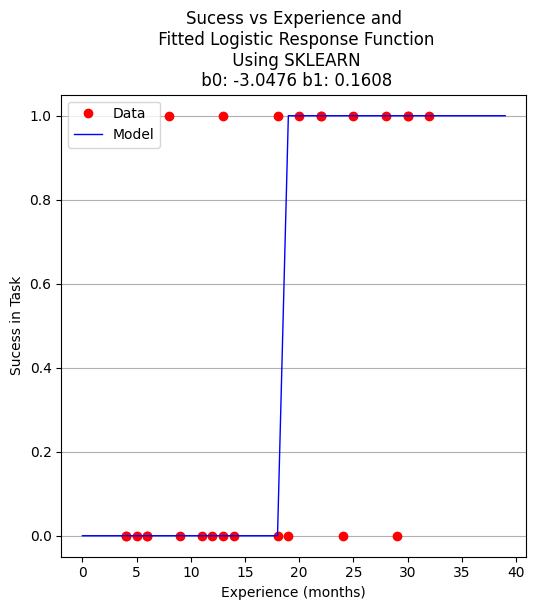

In [24]:
plottitle = 'Sucess vs Experience and\n Fitted Logistic Response Function\n Using SKLEARN\n '+'b0: '+ str(round(b0,4)) + ' b1: ' + str(round(b1,4))
make2plot(experience,result,xplot,y_pred,'Experience (months)','Sucess in Task',plottitle)

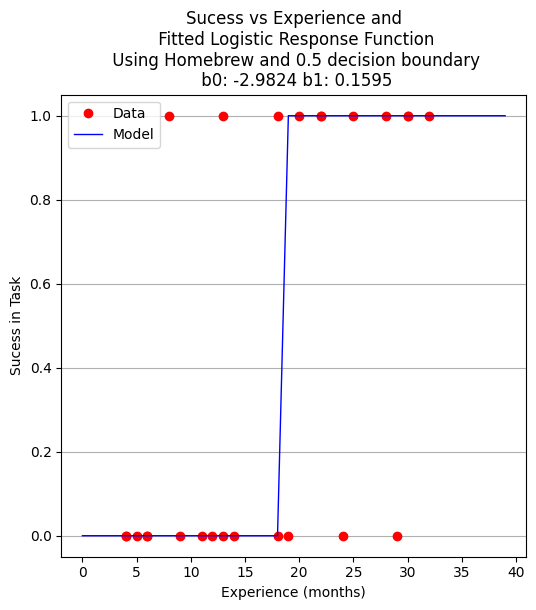

In [25]:
for i in range(40):
    xaxis[i]=float(i)
    fitted[i]=pii(beta[0],beta[1],float(i))
#    fitted[i]=pii(b0,b1,float(i))
    if fitted[i] > 0.5:
        fitted[i] = 1.0
    else:
        fitted[i]=0.0

plottitle = 'Sucess vs Experience and\n Fitted Logistic Response Function\n Using Homebrew and 0.5 decision boundary\n '+'b0: '+ str(round(beta[0],4)) + ' b1: ' + str(round(beta[1],4))
make2plot(experience,result,xaxis,fitted,'Experience (months)','Sucess in Task',plottitle)

A proper ML approach would create a hold-out set (split) to provide some test of the model - in this example the data set is too small but to explore the syntax using ML workflow ....

### Split the Data Set

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Now perform the ML execrise in typical workflow

In [27]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
# fit the model with data  -TRAIN the model
logreg.fit(X_train.reshape(-1, 1),y_train)

LogisticRegression(max_iter=10000)

In [28]:
xplot = numpy.array(xaxis)
y_pred=logreg.predict(X_test.reshape(-1,1))

b0 = logreg.intercept_[0]
b1 = logreg.coef_[0][0]

for i in range(40):
    xaxis[i]=float(i)
#    fitted[i]=pii(beta[0],beta[1],float(i))
    fitted[i]=pii(b0,b1,float(i))
    if fitted[i] > 0.5:
        fitted[i] = 1.0
    else:
        fitted[i]=0.0

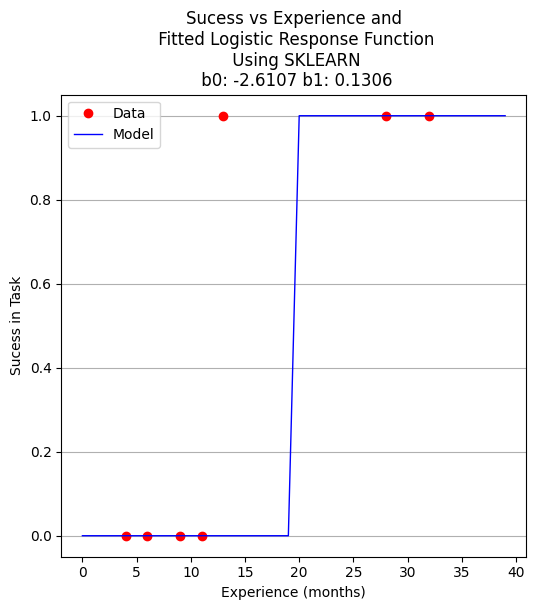

In [29]:
plottitle = 'Sucess vs Experience and\n Fitted Logistic Response Function\n Using SKLEARN\n '+'b0: '+ str(round(b0,4)) + ' b1: ' + str(round(b1,4))
make2plot(X_test,y_test,xaxis,fitted,'Experience (months)','Sucess in Task',plottitle)

### How to assess the performance of logistic regression?

> Binary classification has four possible types of results:
>- True negatives: correctly predicted negatives (zeros)
>- True positives: correctly predicted positives (ones)
>- False negatives: incorrectly predicted negatives (zeros)
>- False positives: incorrectly predicted positives (ones)
    
We usually evaluate the performance of a classifier by comparing the actual and predicted outputs and counting the correct and incorrect predictions.  Our simple graph above conveys the same information, just not as easily interpreted. 

A confusion matrix is a table that is used to display the performance of a classification model. 
    
<br> ![](https://image.jimcdn.com/app/cms/image/transf/dimension=699x10000:format=png/path/s8ff3310143614e07/image/iab2d53abc26a2bc7/version/1549760945/image.png) <br>

Some other indicators of binary classifiers include the following:
- The most straightforward indicator of classification accuracy is the ratio of the number of correct predictions to the total number of predictions (or observations). 
- The positive predictive value is the ratio of the number of true positives to the sum of the numbers of true and false positives.
- The negative predictive value is the ratio of the number of true negatives to the sum of the numbers of true and false negatives.
- The sensitivity (also known as recall or true positive rate) is the ratio of the number of true positives to the number of actual positives.
- The precision score quantifies the ability of a classifier to not label a negative example as positive. The precision score can be interpreted as the probability that a positive prediction made by the classifier is positive.
- The specificity (or true negative rate) is the ratio of the number of true negatives to the number of actual negatives. 
<br>    ![](https://miro.medium.com/max/936/0*R7idSv1bja3CLC8s.png) <br>
    
The extent of importance of recall and precision depends on the problem. Achieving a high recall is more important than getting a high precision in cases like when we would like to detect as many heart patients as possible. For some other models, like classifying whether a bank customer is a loan defaulter or not, it is desirable to have a high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters. 
There are also a lot of situations where both precision and recall are equally important. Then we would aim for not only a high recall but a high precision as well. In such cases, we use something called F1-score. F1-score is the Harmonic mean of the Precision and Recall: 
<br> ![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/f1score-300x73.png) <br>
This is easier to work with since now, instead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well.
<br>    ![](https://memegenerator.net/img/instances/85090403.jpg) <br>
### Model Evaluation using Confusion Matrix

The confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental content of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [30]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix

array([[4, 1],
       [0, 2]])

However it is often more visible in a heatmap structure

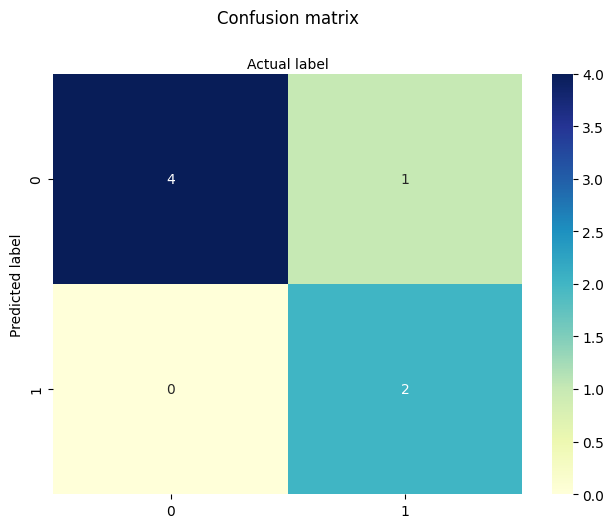

In [31]:
import seaborn as sns
import pandas as pd
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label');

Confusion Matrix Evaluation Metrics: evaluate the model using model evaluation metrics such as accuracy, precision, and recall. Its all built-in to sklearn (although we could get it entirely from our homebrew results too!)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8571428571428571
Precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

